# 1) Classification Experiment :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("C:\\Users\\pavan\\Downloads\\breast-cancer-wisconsin.csv",header= None)
df


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


 # Question 1)a

In [3]:
X =df.iloc[:,1:10].values
Y=df.iloc[:,10] # target column
Y = pd.factorize(Y)[0]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size=400,shuffle= False)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_predict = log_reg.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)
cm

array([[214,   2],
       [  1,  66]], dtype=int64)

In [5]:
# missclassification rate = misclassified test instance/ all test instances 
misclassification_rate = (cm[0,1]+cm[1,0])/cm.sum() 
print("Misclassification_rate is",misclassification_rate)
prob_correct = (cm[0,0]+cm[1,1])/cm.sum()
rms_margin = np.sqrt(np.mean(prob_correct - 0.5)**2)
print("RMS margin is ",rms_margin)

Misclassification_rate is 0.01060070671378092
RMS margin is  0.4893992932862191


# 1)b 

misclassification Rate using kNN clasifier with neighbor 1 is 0.0176678445229682
misclassification Rate using kNN clasifier with neighbor 2 is 0.028268551236749116
misclassification Rate using kNN clasifier with neighbor 3 is 0.014134275618374558
misclassification Rate using kNN clasifier with neighbor 4 is 0.0176678445229682
misclassification Rate using kNN clasifier with neighbor 5 is 0.0176678445229682
misclassification Rate using kNN clasifier with neighbor 6 is 0.01060070671378092
misclassification Rate using kNN clasifier with neighbor 7 is 0.014134275618374558
misclassification Rate using kNN clasifier with neighbor 8 is 0.01060070671378092
misclassification Rate using kNN clasifier with neighbor 9 is 0.01060070671378092
misclassification Rate using kNN clasifier with neighbor 10 is 0.01060070671378092


Text(0, 0.5, 'misclassification Rate in kNN')

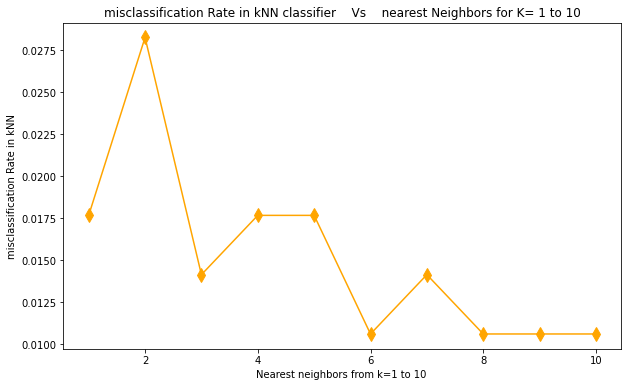

In [6]:
misclassification_rate=[]
for i in range(10):
    knn_c = KNeighborsClassifier(n_neighbors=i+1)
    knn_c.fit(X_train,Y_train)
    y_pred_kncc_i = knn_c.predict(X_test)
    print ("misclassification Rate using kNN clasifier with neighbor",i+1,"is",  np.mean(y_pred_kncc_i!=Y_test))
    misclassification_rate.append(np.mean(y_pred_kncc_i!= Y_test))
    cm_knn = confusion_matrix(Y_test,y_pred_kncc_i)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),misclassification_rate, color='orange', marker='d', markersize=10) 
plt.title('misclassification Rate in kNN classifier    Vs    nearest Neighbors for K= 1 to 10')
plt.xlabel('Nearest neighbors from k=1 to 10 ')
plt.ylabel('misclassification Rate in kNN')

# 1)c

In [7]:
lda =LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
y_pred_lda = lda.predict(X_test)
cm_1 = confusion_matrix(Y_test, y_pred_lda)
print('misclassification_rate in LDA is', np.mean(y_pred_lda!= Y_test))
cm_1

misclassification_rate in LDA is 0.0176678445229682


array([[215,   1],
       [  4,  63]], dtype=int64)

# 1)d

In [8]:
# svm with linear kernel

In [9]:
linear_svm = SVC(kernel='linear', probability=True)
linear_svm.fit(X_train, Y_train)
y_pred_linear = linear_svm.predict(X_test)
print("misclassification rate in svm for linear kernel is", np.mean(y_pred_linear!=Y_test))
cm1 = confusion_matrix(Y_test,y_pred_linear)
prob_correct_1 = (cm1[0,0]+cm1[1,1])/cm1.sum()
rms_margin_1 = np.sqrt(np.mean(prob_correct_1 - 0.5)**2)
print("RMS margin for svm is",rms_margin_1)


misclassification rate in svm for linear kernel is 0.014134275618374558
RMS margin for svm is 0.48586572438162545


In [7]:
# svm with poly kernel for degrees 2 to 5

In [8]:
poly_svm = SVC(kernel="poly",degree=2,probability= True)
poly_svm.fit(X_train, Y_train)
y_pred_poly = poly_svm.predict(X_test)
print("misclassification rate in svm for poly kernel with degree 2 is", np.mean(y_pred_poly!=Y_test))
cm2 = confusion_matrix(Y_test,y_pred_poly)
prob_correct_2 = (cm2[0,0]+cm2[1,1])/cm2.sum()
rms_margin_2 = np.sqrt(np.mean(prob_correct_2 - 0.5)**2)
print("RMS margin for svm with degree 2 is",rms_margin_2)

poly_svm_a = SVC(kernel="poly", degree=3,probability= True)
poly_svm_a.fit(X_train, Y_train)
y_pred_poly_1= poly_svm_a.predict(X_test)
print("misclassification rate in svm for poly kernel with degree 3 is", np.mean(y_pred_poly_1!=Y_test))
cm2_1 = confusion_matrix(Y_test,y_pred_poly_1)
prob_correct_2_1 = (cm2_1[0,0]+cm2_1[1,1])/cm2_1.sum()
rms_margin_2_1 = np.sqrt(np.mean(prob_correct_2_1 - 0.5)**2)
print("RMS margin for svm with degree 3 is",rms_margin_2_1)

poly_svm_b = SVC(kernel="poly", degree=4,probability= True)
poly_svm_b.fit(X_train, Y_train)
y_pred_poly_2= poly_svm_b.predict(X_test)
print("misclassification rate in svm for poly kernel  with degree 4 is", np.mean(y_pred_poly_2!=Y_test))
cm2_2 = confusion_matrix(Y_test,y_pred_poly_2)
prob_correct_2_2 = (cm2_2[0,0]+cm2_2[1,1])/cm2_2.sum()
rms_margin_2_2 = np.sqrt(np.mean(prob_correct_2_2 - 0.5)**2)
print("RMS margin for svm with degree 4 is",rms_margin_2_2)

poly_svm_c = SVC(kernel="poly", degree=5,probability= True)
poly_svm_c.fit(X_train, Y_train)
y_pred_poly_3= poly_svm_c.predict(X_test)
print("misclassification rate in svm for poly kernel with degree 5 is", np.mean(y_pred_poly_3!=Y_test))
cm2_3 = confusion_matrix(Y_test,y_pred_poly_3)
prob_correct_2_3 = (cm2_3[0,0]+cm2_3[1,1])/cm2_3.sum()
rms_margin_2_3 = np.sqrt(np.mean(prob_correct_2_3 - 0.5)**2)
print("RMS margin for svm with degree 5 is",rms_margin_2_3)

misclassification rate in svm for poly kernel with degree 2 is 0.01060070671378092
RMS margin for svm with degree 2 is 0.4893992932862191
misclassification rate in svm for poly kernel with degree 3 is 0.01060070671378092
RMS margin for svm with degree 3 is 0.4893992932862191
misclassification rate in svm for poly kernel  with degree 4 is 0.0353356890459364
RMS margin for svm with degree 4 is 0.4646643109540636
misclassification rate in svm for poly kernel with degree 5 is 0.0353356890459364
RMS margin for svm with degree 5 is 0.4646643109540636


In [9]:
# svm with kernels rbf and sigmoid

In [10]:
rbf_svm = SVC(kernel= "rbf", probability= True)
rbf_svm.fit(X_train,Y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print("misclassification rate in svm for rbf kernel is", np.mean(y_pred_rbf!= Y_test))
cm3 = confusion_matrix(Y_test, y_pred_rbf)
prob_correct_3 = (cm3[0,0]+cm3[1,1])/cm3.sum()
rms_margin_3 = np.sqrt(np.mean(prob_correct_3 - 0.5)**2)
print("RMS margin for svm is", rms_margin_3)


sigmoid_svm = SVC(kernel="sigmoid", probability= True)
sigmoid_svm.fit(X_train, Y_train)
y_pred_sig = sigmoid_svm.predict(X_test)
print("misclassification rate in svm for sigmoid kernel is", np.mean(y_pred_sig!= Y_test))
cm4 = confusion_matrix(Y_test, y_pred_sig)
prob_correct_4 = (cm4[0,0]+cm4[1,1])/cm4.sum()
rms_margin_4 = np.sqrt(np.mean(prob_correct_4 - 0.5)**2)
print("RMS margin for svm is is", rms_margin_4)

misclassification rate in svm for rbf kernel is 0.0176678445229682
RMS margin for svm is 0.4823321554770318
misclassification rate in svm for sigmoid kernel is 0.8374558303886925
RMS margin for svm is is 0.3374558303886926


# 1) e

max_depth is 3 and misclassification rate in decision tree is 0.0353356890459364
max_depth is 4 and misclassification rate in decision tree is 0.024734982332155476
max_depth is 5 and misclassification rate in decision tree is 0.05653710247349823
max_depth is 6 and misclassification rate in decision tree is 0.04240282685512368
max_depth is 7 and misclassification rate in decision tree is 0.04946996466431095
max_depth is 8 and misclassification rate in decision tree is 0.045936395759717315
max_depth is 9 and misclassification rate in decision tree is 0.045936395759717315
max_depth is 10 and misclassification rate in decision tree is 0.053003533568904596


Text(0.5, 1.0, ' Misclassification rates Vs Max depth ')

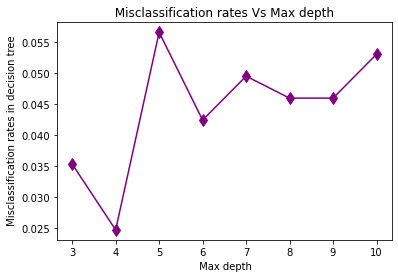

In [11]:
# decision tree
misclassification_rates = []
for i in range(3,11):
    DT_classifier = DecisionTreeClassifier(max_depth = i)
    DT_classifier.fit(X_train, Y_train)
    y_pred_DT = DT_classifier.predict(X_test)
    misclassification_rates.append(np.mean(y_pred_DT!= Y_test))
    print("max_depth is" ,i , "and" ,'misclassification rate in decision tree is',np.mean(y_pred_DT!= Y_test))
# visualizing the decision tree with max depth is 5
decision_tree = DecisionTreeClassifier(max_depth= 5)
decision_tree.fit(X_train,Y_train)
graph_data = tree.export_graphviz(decision_tree,out_file=None)
graph = graphviz.Source(graph_data)
graph
#plt.figure(figsize = (5,6))
plt.plot(range(3,11),misclassification_rates, color = 'purple', marker = 'd', markersize = 9)
plt.ylabel(" Misclassification rates in decision tree")
plt.xlabel(" Max depth")
plt.title(" Misclassification rates Vs Max depth ")

# 1)f 

In [12]:
# adaboost classifier
ada_1 = AdaBoostClassifier(n_estimators  = 100)
ada_2 = AdaBoostClassifier(n_estimators  = 200)
ada_3 = AdaBoostClassifier(n_estimators  = 300)
ada_4 = AdaBoostClassifier(n_estimators  = 400)
ada_5 = AdaBoostClassifier(n_estimators  = 500)
ada_1.fit(X_train,Y_train)
ada_2.fit(X_train,Y_train)
ada_3.fit(X_train,Y_train)
ada_4.fit(X_train,Y_train)
ada_5.fit(X_train,Y_train)
y_pred_ada1 = ada_1.predict(X_test)
y_pred_ada2 = ada_2.predict(X_test)
y_pred_ada3 = ada_3.predict(X_test)
y_pred_ada4 = ada_4.predict(X_test)
y_pred_ada5 = ada_5.predict(X_test)
print("misclassification rate in adaboost for weak learners = 100 is", np.mean(y_pred_ada1!= Y_test))
print("misclassification rate in adaboost for weak learners = 200 is", np.mean(y_pred_ada2!= Y_test))
print("misclassification rate in adaboost for weak learners = 300 is", np.mean(y_pred_ada3!= Y_test))
print("misclassification rate in adaboost for weak learners = 400 is", np.mean(y_pred_ada4!= Y_test))
print("misclassification rate in adaboost for weak learners = 500 is", np.mean(y_pred_ada5!= Y_test))


misclassification rate in adaboost for weak learners = 100 is 0.038869257950530034
misclassification rate in adaboost for weak learners = 200 is 0.038869257950530034
misclassification rate in adaboost for weak learners = 300 is 0.04946996466431095
misclassification rate in adaboost for weak learners = 400 is 0.038869257950530034
misclassification rate in adaboost for weak learners = 500 is 0.04240282685512368


In [13]:
# xgboost classifer or extreme gradient boosting
xg_boost1 = XGBClassifier(n_estimators= 100)
xg_boost2 = XGBClassifier(n_estimators= 200)
xg_boost3 = XGBClassifier(n_estimators= 300)
xg_boost4 = XGBClassifier(n_estimators= 400)
xg_boost5 = XGBClassifier(n_estimators= 500)
xg_boost1.fit(X_train,Y_train)
xg_boost2.fit(X_train,Y_train)
xg_boost3.fit(X_train,Y_train)
xg_boost4.fit(X_train,Y_train)
xg_boost5.fit(X_train,Y_train)
y_pred_xgboost1 = xg_boost1.predict(X_test)
y_pred_xgboost2 = xg_boost2.predict(X_test)
y_pred_xgboost3 = xg_boost3.predict(X_test)
y_pred_xgboost4 = xg_boost4.predict(X_test)
y_pred_xgboost5 = xg_boost5.predict(X_test)
print("misclassification rate in xgboost for weak learners = 100 is", np.mean(y_pred_xgboost1!= Y_test))
print("misclassification rate in xgboost for weak learners = 200 is", np.mean(y_pred_xgboost2!= Y_test))
print("misclassification rate in xgboost for weak learners = 300 is", np.mean(y_pred_xgboost3!= Y_test))
print("misclassification rate in xgboost for weak learners = 400 is", np.mean(y_pred_xgboost4!= Y_test))
print("misclassification rate in xgboost for weak learners = 500 is", np.mean(y_pred_xgboost5!= Y_test))

misclassification rate in xgboost for weak learners = 100 is 0.02120141342756184
misclassification rate in xgboost for weak learners = 200 is 0.02120141342756184
misclassification rate in xgboost for weak learners = 300 is 0.02120141342756184
misclassification rate in xgboost for weak learners = 400 is 0.02120141342756184
misclassification rate in xgboost for weak learners = 500 is 0.02120141342756184


In [14]:
# random forest classifer
rfc1 = RandomForestClassifier(n_estimators= 100)
rfc2 = RandomForestClassifier(n_estimators= 200, random_state=40)
rfc3 = RandomForestClassifier(n_estimators= 300)
rfc4 = RandomForestClassifier(n_estimators= 400)
rfc5 = RandomForestClassifier(n_estimators= 500)
rfc1.fit(X_train,Y_train)
rfc2.fit(X_train,Y_train)
rfc3.fit(X_train,Y_train)
rfc4.fit(X_train,Y_train)
rfc5.fit(X_train,Y_train)
y_pred_rfc1 = rfc1.predict(X_test)
y_pred_rfc2 = rfc2.predict(X_test)
y_pred_rfc3 = rfc3.predict(X_test)
y_pred_rfc4 = rfc4.predict(X_test)
y_pred_rfc5 = rfc5.predict(X_test)
print("misclassification rate in Random forest for weak learners = 100 is", np.mean(y_pred_rfc1!= Y_test))
print("misclassification rate in Random forest for weak learners = 200 is", np.mean(y_pred_rfc2!= Y_test))
print("misclassification rate in Random forest for weak learners = 300 is", np.mean(y_pred_rfc3!= Y_test))
print("misclassification rate in Random forest for weak learners = 400 is", np.mean(y_pred_rfc4!= Y_test))
print("misclassification rate in Random forest for weak learners = 500 is", np.mean(y_pred_rfc5!= Y_test))

misclassification rate in Random forest for weak learners = 100 is 0.01060070671378092
misclassification rate in Random forest for weak learners = 200 is 0.0176678445229682
misclassification rate in Random forest for weak learners = 300 is 0.01060070671378092
misclassification rate in Random forest for weak learners = 400 is 0.0176678445229682
misclassification rate in Random forest for weak learners = 500 is 0.01060070671378092


# 1) g

 Comparing the above mentioned classification algorithms with the weighted cost. So, before comparing with the misclassification rates, weighted cost for all the above mentioned classifiers are evaluated.



In [15]:
# logistic regression.
cost_1 = cm[0,1]
cost_100 = cm[1,0]*100
cost_total = (cost_1 + cost_100)/6916   # maximum cost is 6916
cost_total
print('weighted  cost for logistic regression is', cost_total)

weighted  cost for logistic regression is 0.014748409485251591


In [16]:
# knn classifier
knn_cost_overall = []
for i in range(1,11):
    knn_c = KNeighborsClassifier(n_neighbors=i)
    knn_c.fit(X_train,Y_train)
    y_pred_kncc_i = knn_c.predict(X_test)
    cm_knn = confusion_matrix(Y_test,y_pred_kncc_i)
    knn_cost_1 = cm_knn[0,1]
    knn_cost_100 = cm_knn[1,0]*100
    knn_cost_total = (knn_cost_1 + knn_cost_100)/6916   # maximum cost is 6916
    knn_cost_overall.append(knn_cost_total)
print("weighted cost for the KNN classifier from 1 to 10 neighbors are ",knn_cost_overall)

weighted cost for the KNN classifier from 1 to 10 neighbors are  [0.015037593984962405, 0.08704453441295547, 0.000578368999421631, 0.029352226720647773, 0.015037593984962405, 0.014748409485251591, 0.014893001735106999, 0.014748409485251591, 0.014748409485251591, 0.014748409485251591]


In [17]:
# linear discriminant analysis
LDA_cost_1 = cm_1[0,1]
LDA_cost_100 = cm_1[1,0]*100
LDA_cost_total = (LDA_cost_1 + LDA_cost_100)/6916    # maximum cost is 6916
LDA_cost_total
print("weighted cost for the linear discriminant analysis",LDA_cost_total)

NameError: name 'cm_1' is not defined

In [ ]:
# support vector machine
# weighted cost for linear kernel in SVM
linear_cost_1 = cm1[0,1]
linear_cost_100 = cm1[1,0]*100
linear_cost_total = (linear_cost_1 + linear_cost_100)/ 6916   # maximum cost is 6916
linear_cost_total
print("weighted cost for SVM with linear lernel is", linear_cost_total)
#for polynomial kernel
poly_cost_1 = cm2[0,1]
poly_cost_100 = cm2[1,0]*100
poly_cost_total = (poly_cost_1+ poly_cost_100)/6916
print("weighted cost of SVM for polynomial kernel with degree 2 is", poly_cost_total)
poly1_cost_1 = cm2_1[0,1]
poly1_cost_100 = cm2_1[1,0]*100
poly1_cost_total = (poly1_cost_1 + poly1_cost_100)/6916
print("weighted cost of SVM for polynomial kernel with degree 3 is", poly1_cost_total)
poly2_cost_1 = cm2_2[0,1]
poly2_cost_100 = cm2_2[1,0]*100
poly2_cost_total = (poly2_cost_1 + poly2_cost_100)/6916
print("weighted cost of SVM for polynomial kernel with degree 4 is", poly2_cost_total)
poly3_cost_1 = cm2_3[0,1]
poly3_cost_100 = cm2_3[1,0]*100
poly3_cost_total = (poly3_cost_1 + poly3_cost_100)/6916
print("wieighted cost of SVM for polynomial kernel with degree 5 is", poly3_cost_total)
# for rbf kernel
rbf_cost_1 = cm3[0,1]
rbf_cost_100 = cm3[1,0]*100
rbf_cost_total = (rbf_cost_1 + rbf_cost_100)/6916
print("weighted cost for SVM with rbf kernel is", rbf_cost_total)
# for sigmoid kernel
sig_cost_1 = cm4[0,1]
sig_cost_100 = cm4[1,0]*100
sig_cost_total = (sig_cost_1 + sig_cost_100)/6916
print("weighted cost for SVM with sigmoid kernel is",sig_cost_total)

In [ ]:
# decision tree 
DT_cost_overall = []
for i in range(3,11):
    DT_classifier = DecisionTreeClassifier(max_depth = i)
    DT_classifier.fit(X_train, Y_train)
    y_pred_DT = DT_classifier.predict(X_test)
    cm_DT = confusion_matrix(Y_test,y_pred_DT)
    DT_cost_1 = cm_DT[0,1]
    DT_cost_100 = cm_DT[1,0]*100
    DT_cost_total = (DT_cost_1 + DT_cost_100)/6916   # maximum cost is 6916
    DT_cost_overall.append(DT_cost_total)
print("weighted cost for decision tree with max depth from 3 to 10 are", DT_cost_overall)


In [ ]:
# Ada boost
ada_cost_overall = []
for i in range(100,600,100):
    ada_classifier = AdaBoostClassifier(n_estimators= i)
    ada_classifier.fit(X_train, Y_train)
    y_pred_ada = ada_classifier.predict(X_test)
    cm_ada = confusion_matrix(Y_test,y_pred_ada)
    ada_cost_1 = cm_ada[0,1]
    ada_cost_100 = cm_ada[1,0]*100
    ada_cost_total = (ada_cost_1 + ada_cost_100)/6916  # maximum cost is 6916
    ada_cost_overall.append(ada_cost_total)
print("weighted cost for ada boost classifer with weak learners 100, 200, 300, 400, 500 are", ada_cost_overall)

In [ ]:
# Xgboost
xgb_cost_overall = []
for i in range(100, 600, 100):
    xgb_classifier = XGBClassifier(n_estimators = i)
    xgb_classifier.fit(X_train, Y_train)
    y_pred_xgb = xgb_classifier.predict(X_test)
    cm_xgb = confusion_matrix(Y_test,y_pred_xgb)
    xgb_cost_1 = cm_xgb[0,1]
    xgb_cost_100 = cm_xgb[1,0]*100
    xgb_cost_total = (xgb_cost_1 + xgb_cost_100)/6916  # maximum cost is 6916  
    xgb_cost_overall.append(xgb_cost_total)
print("weighted cost for the xgboost classifier with weak learners 100, 200, 300, 400, 500 are", xgb_cost_overall)

In [ ]:
# Random forest classifier
rfc_cost_overall = []
for i in range(100,600, 100):
    rfc_classifier = RandomForestClassifier(n_estimators= i)
    rfc_classifier.fit(X_train, Y_train)
    y_pred_rfc = rfc_classifier.predict(X_test)
    cm_rfc = confusion_matrix(Y_test, y_pred_rfc)
    rfc_cost_1 = cm_rfc[0,1]
    rfc_cost_100 = cm_rfc[1,0]*100
    rfc_cost_total = (rfc_cost_1 + rfc_cost_100)/6916     # maximum cost is 6916
    rfc_cost_overall.append(rfc_cost_total)
print("weighted cost for random forest with weak learners 100, 200, 300, 400, 500 are", rfc_cost_overall)

conclusion :

In order to be the best classifier algorithm, here the misclassification rate and weighted cost must be low. Otherwise, we can't say that the algorithms are good enough to consider. So,

1) Having considered all the above mentioned classification algorithms, I can clearly say the best classification algorithm in terms of misclassification rate is logistic regression and also KNN with a few neighbors but not with all neighbors.

2) Next, In terms of weighted cost the best classification algorithms is KNN (only few neighbors) and even the logistic regression is also good as it has minimum weighted cost.
